In [1]:
# data path
DATA_PH = "../data/Combined Cycle Power Plant Data Set.csv"

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# read data
df = pd.read_csv(DATA_PH)
df.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11   39.4  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82   37.5  1009.23  96.62   473.9

In [4]:
def convert_to_numeric(df):
    """
    errors = 'coerce':
        Convert non-numeric values to NaN.
    """
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = convert_to_numeric(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


## Data Cleaning

* As you can see, our data is not that dirty, we only has 4 feature and all are numeric values.

* We will try to check for missing values and outlies in our data set.

#### Missing values

In [5]:
df.isnull().sum()

AT    4
V     4
AP    4
RH    4
PE    4
dtype: int64

In [6]:
df.shape

(47844, 5)

In [6]:
df1 = df.dropna()

In [7]:
df1.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
df1.shape

(47840, 5)

#### Outlier Removal

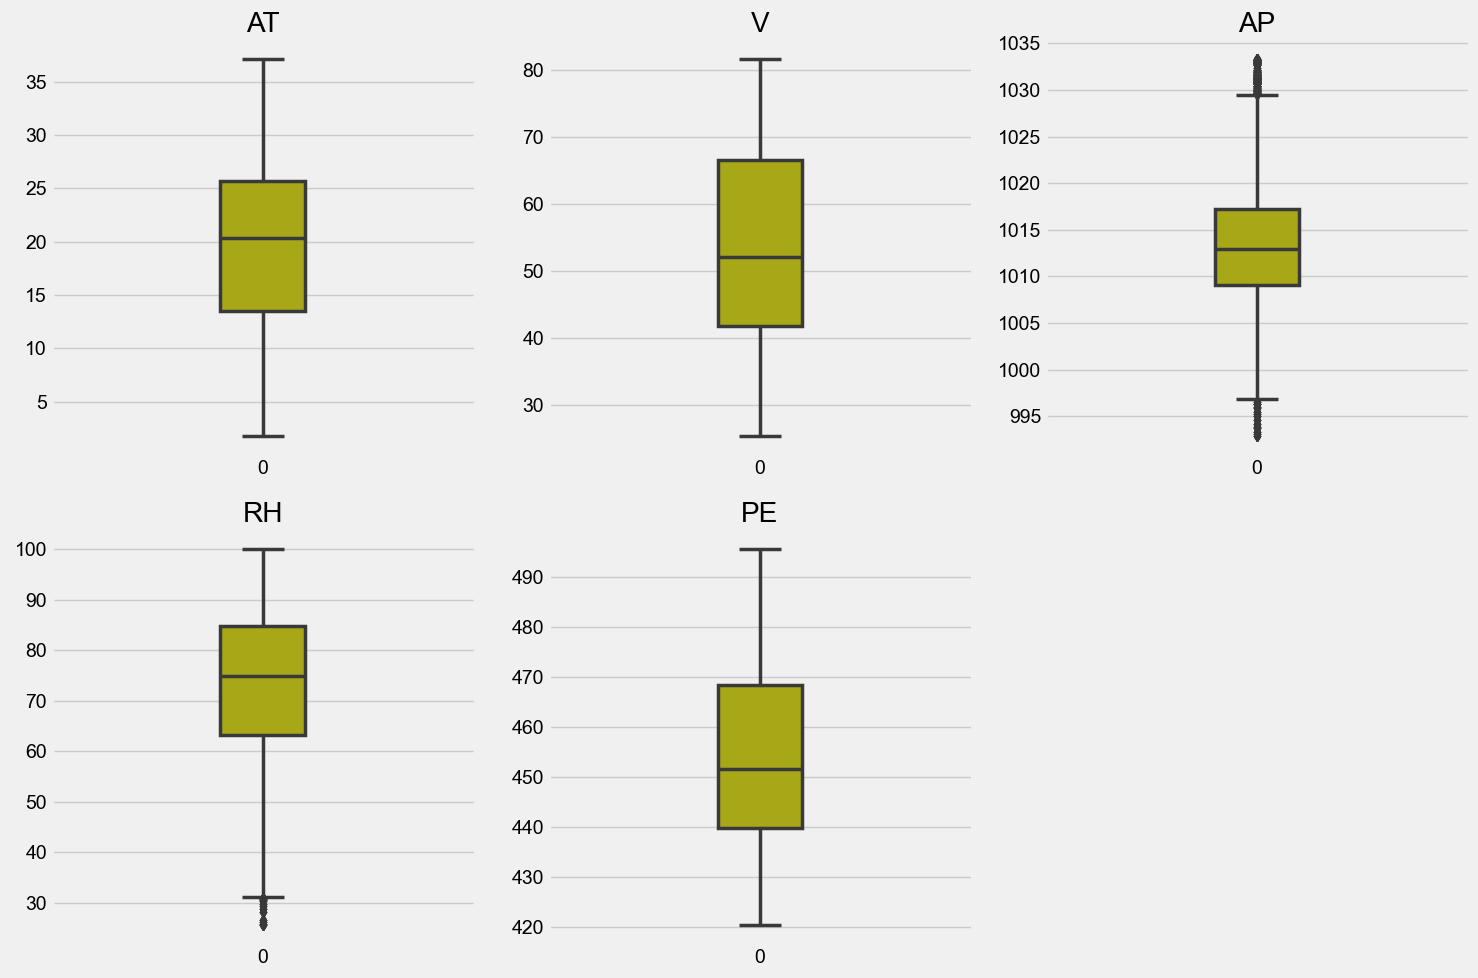

In [42]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))

for i, col in enumerate(df1.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df1[col],color='y',orient='v',width=0.2,dodge=True,linewidth=2.5).set_title(col)

plt.tight_layout()
sns.set(font_scale=1.1)
sns.despine()
plt.show()

- As we see that there is an outlier in the `RH` and `AP` feature in our data set. we need to remove it.
- Outliers are extreme values and it is not useful for prediction in regression models.

In [38]:
# using plotly express to see the outliers in data Distribution
fig = px.box(df1['AP'],points='all',title='AP')
fig.show()

In [39]:
# using plotly express to see the outliers in data Distribution
fig = px.box(df1['AT'],points='all',title='AT')
fig.show()

In [40]:
# using plotly express to see the outliers in data Distribution
fig = px.box(df1['PE'],points='all',title='PE')
fig.show()

In [41]:
# using plotly express to see the outliers in data Distribution
fig = px.box(df1['RH'],points='all',title='RH')
fig.show()

In [8]:
# Let's use the Percentiles or IQR Method 
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# save it in new dataframe
df2 = df1[((df1 > lower_bound) & (df1 < upper_bound)).all(axis=1)]


print(f'shape of df1: {df1.shape}')
print(f'shape of df2: {df2.shape}')

shape of df1: (47840, 5)
shape of df2: (47340, 5)


- As we see that there is 500 instance in df1 were removed as outliers as we see.

- removing outliers helps algorithms to learn better in more generalization manner.

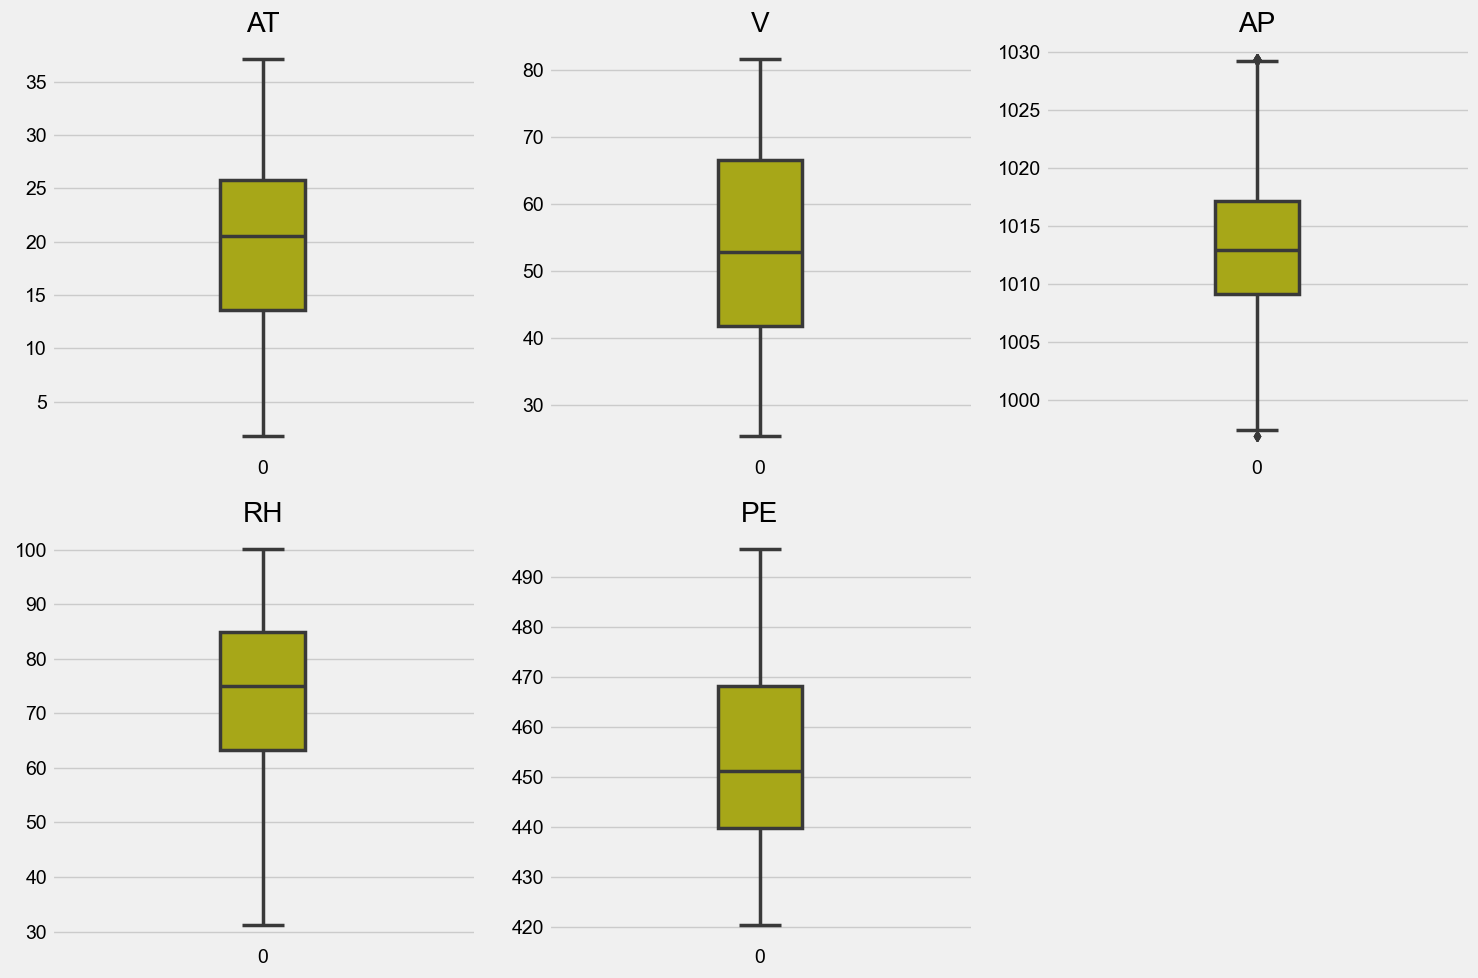

In [16]:
# plot to check outliers in boxplot of df2
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))

for i, col in enumerate(df2.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df2[col],color='y',orient='v',width=0.2,dodge=True,linewidth=2.5).set_title(col)

plt.tight_layout()
sns.set(font_scale=1.1)
sns.despine()
plt.show()

In [8]:
# Split data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.2, random_state=42)

print(f'--> train: {train.shape}')
print(f'--> test: {test.shape}')

--> train: (37872, 5)
--> test: (9468, 5)


In [9]:
# save data
df2.to_pickle('../data/preprocessed_data.pkl')
train.to_pickle('../data/train.pkl')
test.to_pickle('../data/test.pkl')